In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "Optimized_Placement_Dataset_with_Noise.csv"
data = pd.read_csv(file_path)

# Handle missing values: Fill missing categorical data with "Unknown"
categorical_cols = ["Knows ML", "Knows Python", "Knows JavaScript", "Knows HTML", "Knows CSS"]
data[categorical_cols] = data[categorical_cols].fillna("Unknown")

# Check for duplicates
data = data.drop_duplicates()

# Display basic stats
print(data.describe())
print(data.info())


            Roll No.  No. of DSA questions           CGPA  No. of backlogs  \
count  218734.000000         218734.000000  218734.000000    218734.000000   
mean    54861.573633            180.459279       5.724198         2.771229   
std     25986.177390            112.252759       1.434292         1.495337   
min         0.000000              0.000000       2.513484         0.000000   
25%     32394.000000             94.000000       4.891452         2.000000   
50%     54700.000000            189.000000       5.348536         3.000000   
75%     77388.000000            263.000000       6.775874         4.000000   
max     99999.000000            449.000000       9.741144         5.000000   

       Interview Room Temperature  Age of Candidate  Placement Package  
count               218734.000000     218734.000000      218734.000000  
mean                    24.003781         21.496946          19.539267  
std                      3.467503          2.290660           6.531255  
min  

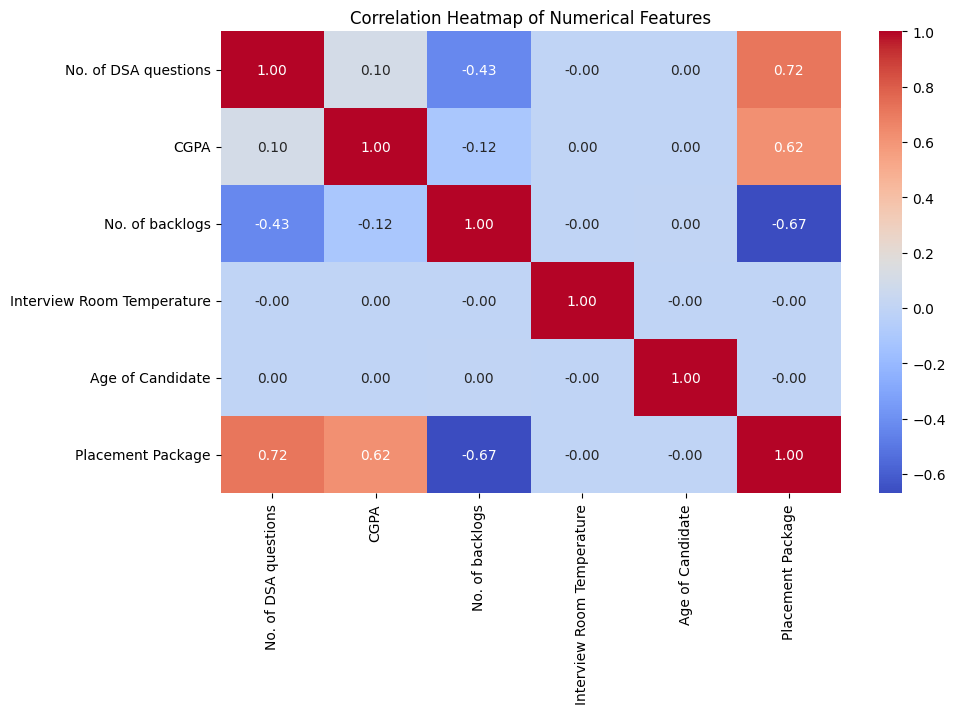

In [ ]:
# Correlation heatmap for numerical features
numerical_cols = ["No. of DSA questions", "CGPA", "No. of backlogs", 
                  "Interview Room Temperature", "Age of Candidate", "Placement Package"]

corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


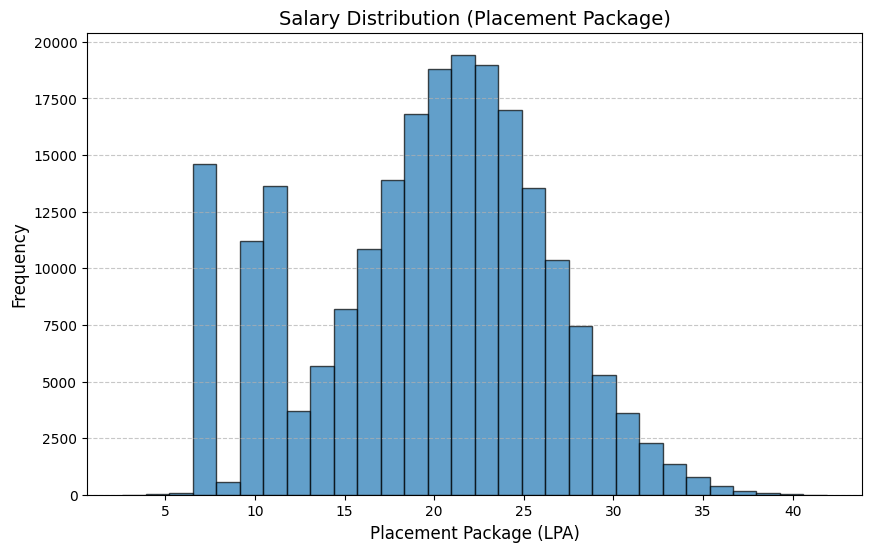

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['Placement Package'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Salary Distribution (Placement Package)', fontsize=14)
plt.xlabel('Placement Package (LPA)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

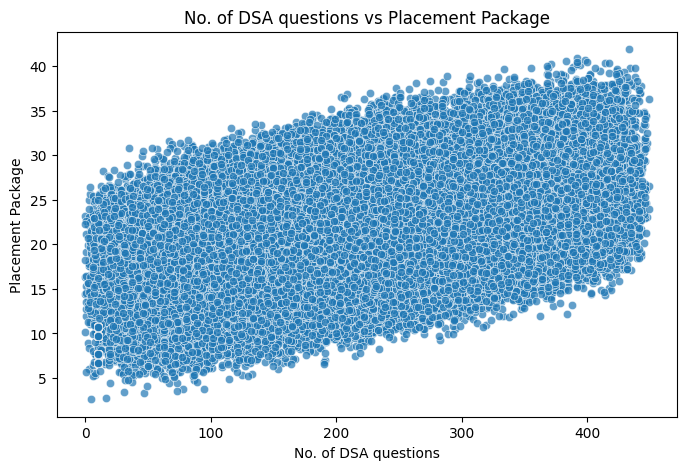

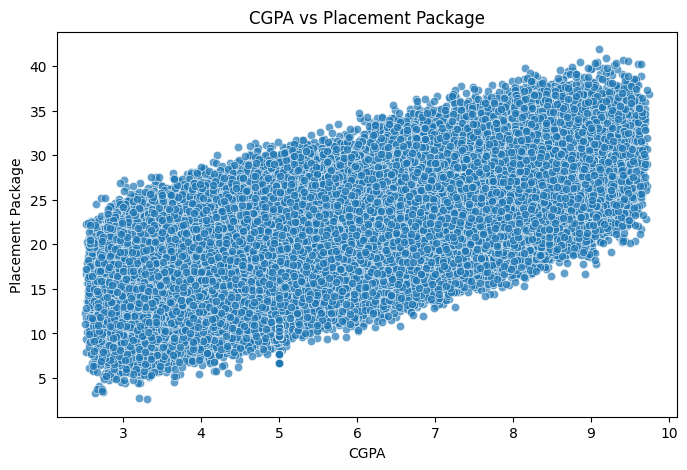

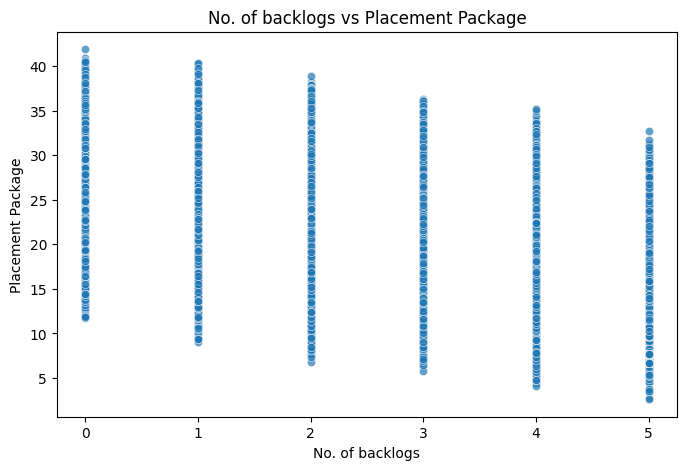

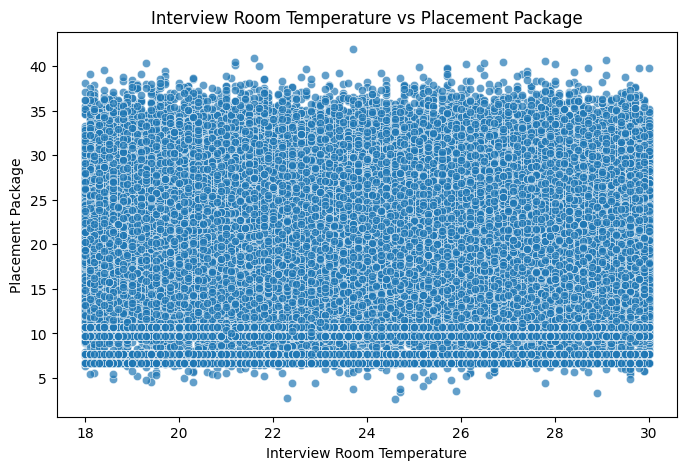

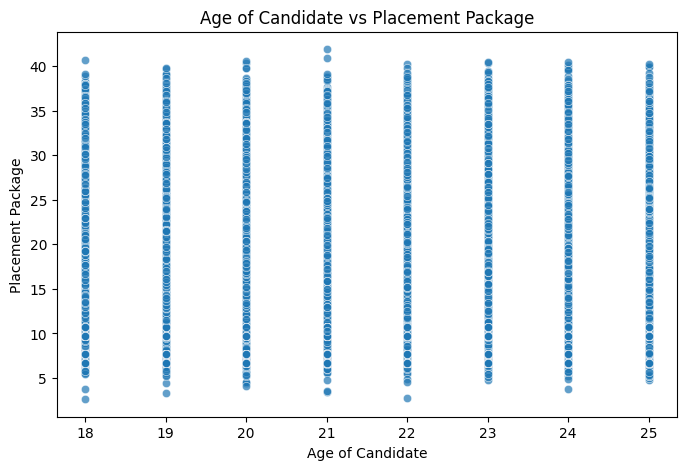

In [ ]:
# Pairwise scatter plots for numerical features vs Placement Package
for col in numerical_cols[:-1]:  # Exclude Placement Package
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=col, y="Placement Package", alpha=0.7)
    plt.title(f"{col} vs Placement Package")
    plt.xlabel(col)
    plt.ylabel("Placement Package")
    plt.show()


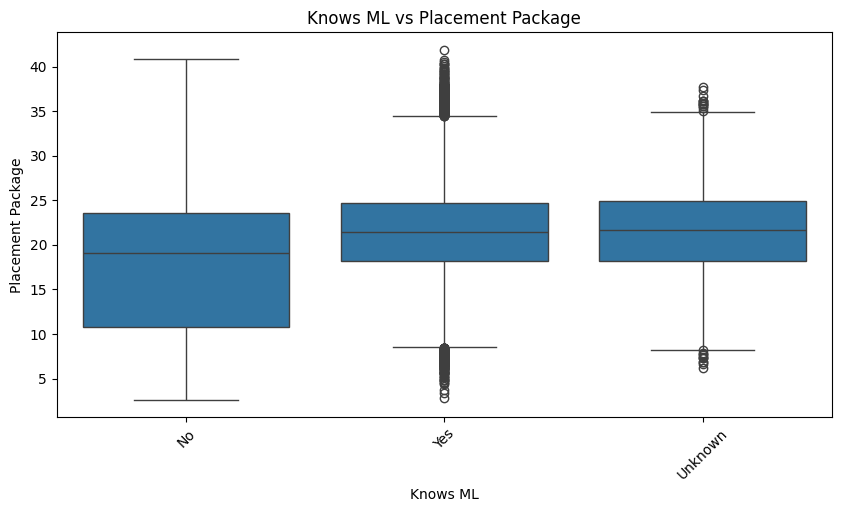

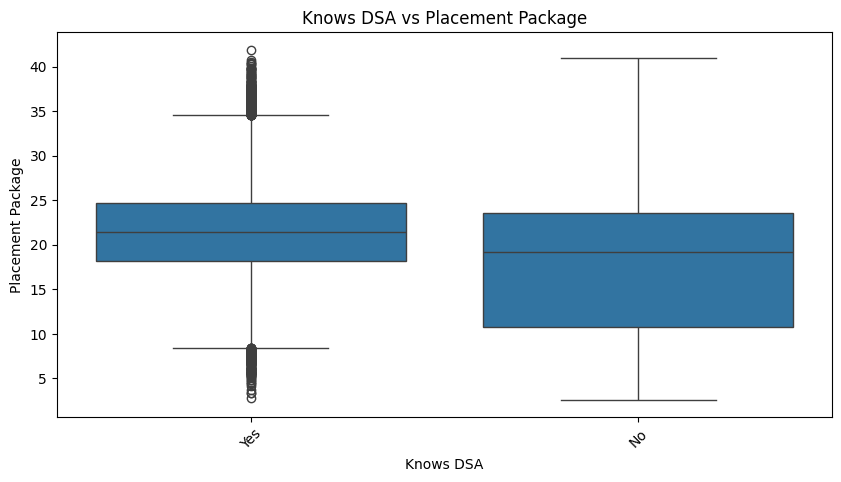

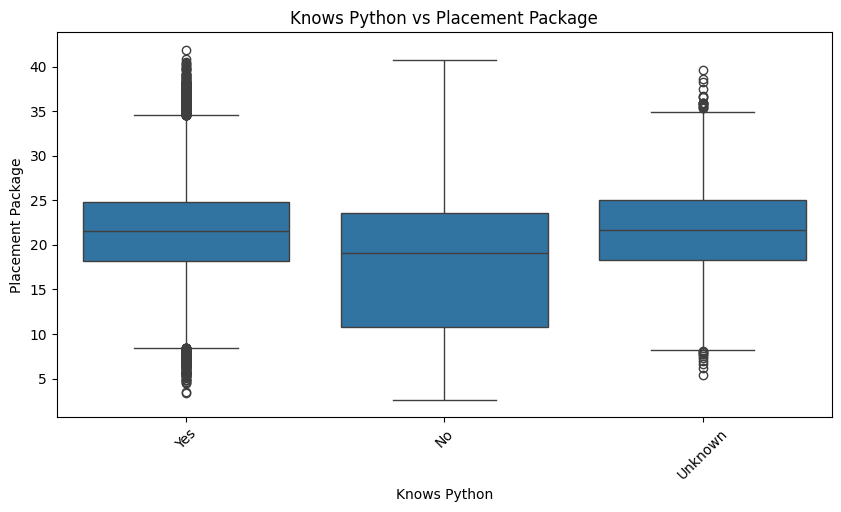

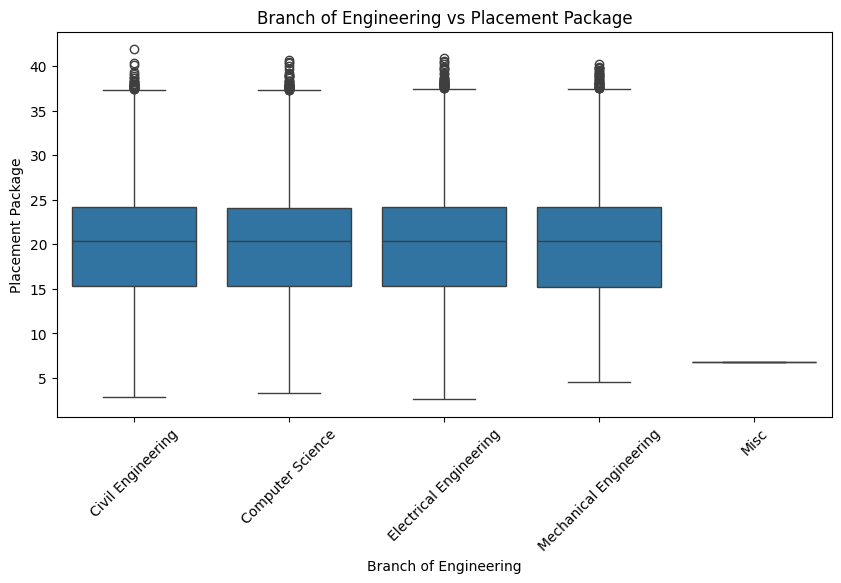

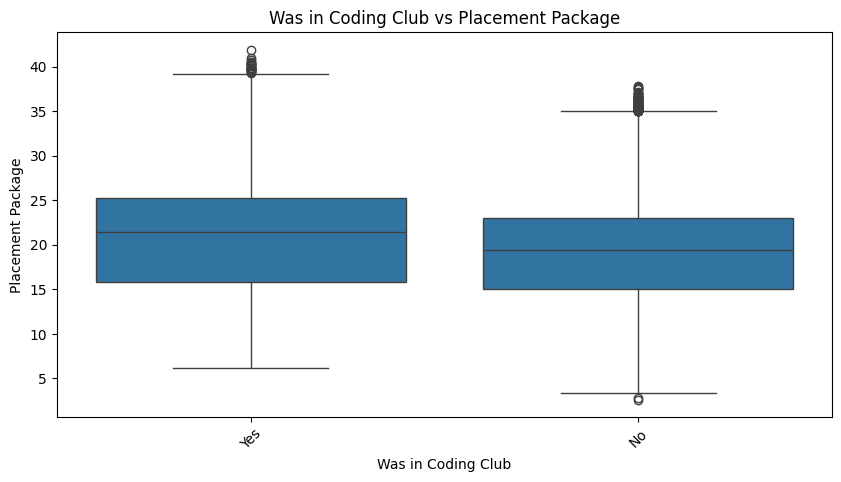

In [ ]:
# Categorical feature vs Placement Package
categorical_cols = ["Knows ML", "Knows DSA", "Knows Python", 
                    "Branch of Engineering", "Was in Coding Club"]

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x=col, y="Placement Package")
    plt.title(f"{col} vs Placement Package")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Encode categorical variables
encoded_data = data.copy()
label_encoders = {}
for col in categorical_cols + ["Branch of Engineering"]:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
X = encoded_data.drop(columns=["Placement Package", "Name of Student", "Roll No."])
y = encoded_data["Placement Package"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Evaluate model
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")


ValueError: could not convert string to float: 'No'